# BAN6420 Module 2 Assignment: Salary Function
# Voke Harrison Edafejimue
# Learner ID - 143304

In [3]:
#import libraries
from zipfile import ZipFile
import sys, os
import pandas as pd
import statistics
import seaborn as sns

import numpy as np
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cwd = os.getcwd()
with ZipFile('netflix_data.zip', 'r') as Zip:
    Zip.extractall(cwd)

#rename the unziped file from netflix_data.csv to Netflix_shows_movies.csv
source = os.path.join(cwd, 'netflix_data.csv')
destination = os.path.join(cwd, 'Netflix_shows_movies.csv')
os.rename(source,destination)
print("File Renamed successfully")

File Renamed successfully


In [7]:
# DATA CLEANING
# Create a dataframe
df = pd.read_csv('Netflix_shows_movies.csv')

# #Identify Movies/TV Shows without 'Directors' Stated and fill with N/A.

df["director"].fillna("N/A", inplace = True) 

#Identify Movies/TV Shows without 'Cast' Stated and fill with N/A.

df["cast"].fillna("N/A", inplace = True) 

#Identify Movies/TV Shows without 'Rating' Stated and fill with N/A.

df["rating"].fillna("N/A", inplace = True) 

#Identify Movies/TV Shows without 'County' Stated and fill with N/A.

df["country"].fillna("N/A", inplace = True) 

#Identify Movies/TV Shows without 'Date Added' Stated and fill with N/A.

df["date_added"].fillna("N/A", inplace = True) 

# Remove every other row with empty values
# Identify rows with NaN values
rows_with_nan = df[df.isnull().any(axis=1)] 

#View the number of rows with NaN values
print(f"{len(rows_with_nan)} rows with Missing Values")

# Drop rows with missing values and display the empty Dataframe, that is all rows with NaN have been dropped.
df.dropna(inplace=True)
rows_with_nan = df[df.isnull().any(axis=1)] 
#View the number of rows with NaN values
print("All rows with Missing Values Dropped Sucessfully")

0 rows with Missing Values
All rows with Missing Values Dropped Sucessfully


In [8]:
# Check for duplicates
cleaned_df = df[df.duplicated()]
count_duplicates = len(cleaned_df)
print(count_duplicates)
# Drop the duplicates
if count_duplicates == 0:
    print("No Duplicates")
else:
    cleaned_df = df.drop_duplicates()
    print("All Duplicate rows removed")

0
No Duplicates


In [9]:
# DATA EXPLORATION
# Describe the data

print(df.describe())

            show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      6234 non-null   object
 4   cast          6234 non-null   object
 5   country       6234 non-null   object
 6   date_added    6234 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6234 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [11]:
# STATISTICAL ANALYSIS
# Code to find the Director with the highest number of movies/TV Shows from 1925 - 2020
new_df = df[(df.director != 'N/A')]
top_director = statistics.mode(new_df.set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True))
print(f"The Directors with the Highest Number of Movies/TV shows on NetFlix from 1925 - 2020: {top_director}")

# Code to find The Most Popular Actor on NetFlix from 1925 - 2020.
new_df = df[(df.cast != 'N/A')]
top_actor = statistics.mode(new_df.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True))
print(f"The Most Featured Actor on NetFlix from 1925 - 2020:  {top_actor}")

# Code to find the Year with the most Movies/TV Shows releases.

print("The Year with the Most Movies/TV Shows release on NetFlix: % s" % (statistics.mode(df['release_year'])))

# Code to find the Year with the most Movies/TV Shows releases.

top_genres = statistics.mode(df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True))
print(f"The Most watched Movies/TV Shows on NetFlix between 1925 to 2020: {top_genres}")

The Directors with the Highest Number of Movies/TV shows on NetFlix from 1925 - 2020: Jan Suter
The Most Featured Actor on NetFlix from 1925 - 2020:  Anupam Kher
The Year with the Most Movies/TV Shows release on NetFlix: 2018
The Most watched Movies/TV Shows on NetFlix between 1925 to 2020: International Movies


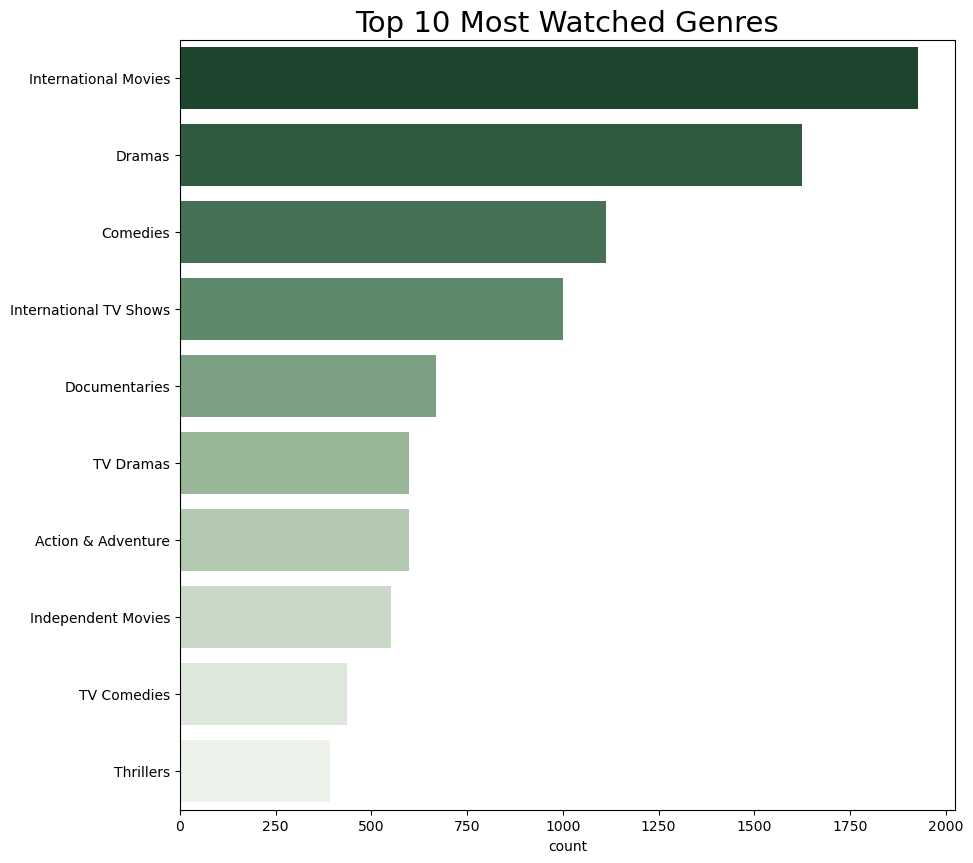

In [12]:
# DATA VISUALIZATION

# 1st Visualization
# Most watched genres.

top_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10, 10))
sns.countplot(y=top_genres, order=top_genres.value_counts().index.to_list()[:10], palette='Greens_r', saturation=.4)
plt.title('Top 10 Most Watched Genres', fontsize=21);

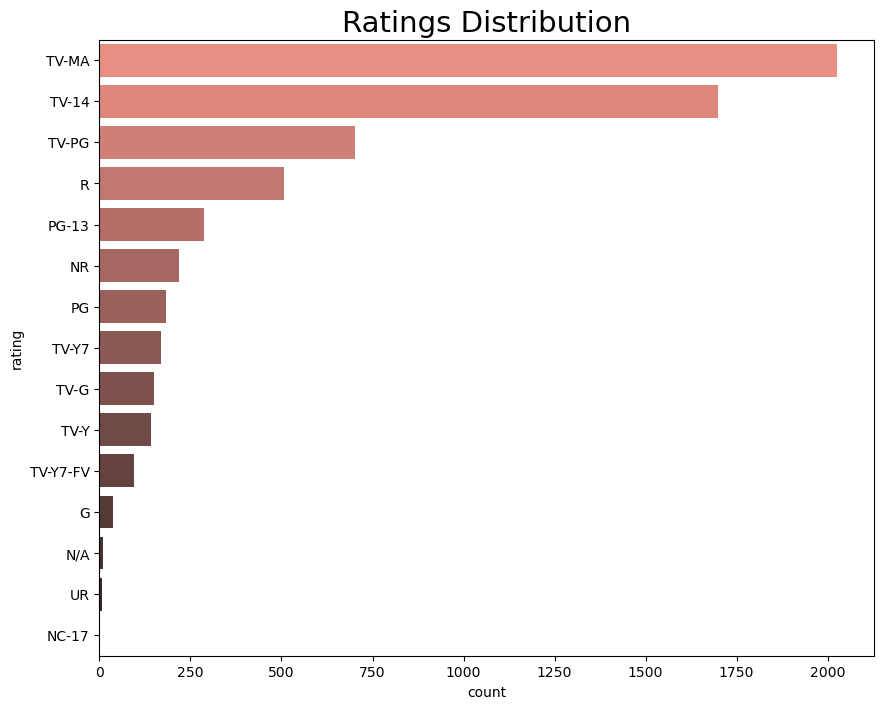

In [13]:
# 2nd Visualization
# Ratings distribution.

plt.figure(figsize=(10, 8))
sns.countplot(y='rating', data=df, order=df.rating.value_counts().index.to_list(), palette='dark:salmon_r')
plt.title('Ratings Distribution', fontsize=21);
